# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [69]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [70]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data

    

In [71]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    init_centers = data[np.random.choice(data.shape[0], size=K)]
    return init_centers 

In [72]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0])

In [73]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centers, axis=2)
    return distances


In [74]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1)

In [75]:
### TODO 4 :  M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2 
def update_centers(data, labels, K):
    new_centers = np.zeros((K, data.shape[1]))
    for k in range(K):
        new_centers[k] = data[labels == k].mean()
    return new_centers

In [76]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [77]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)
    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [78]:
### TODO 7
def visualise(data_path, labels, centers):
    
    data = load_data(data_path)
# Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label = 'Cluster')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')
# Set title, xlabel, and ylabel
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

# Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')
    plt.legend()
# Show the plot
    plt.show()
## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0002307891845703125


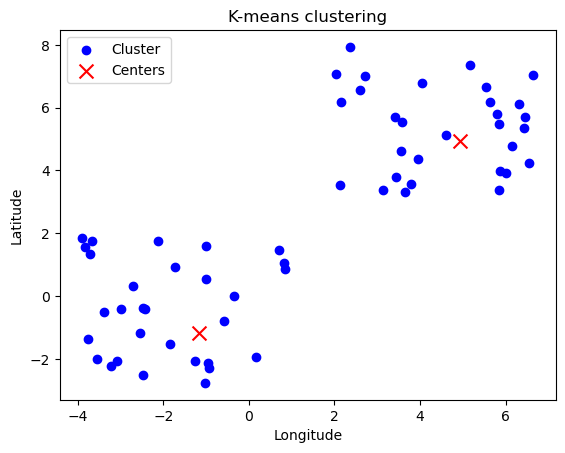

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [79]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)

In [ ]:
### if we already know that K = 2, then we can set different colours for the 2 clusters, otherwise i can't find any possible way to colour them differently.
### for assuming K = 2

def visualise(data_path, labels, centers):
    
    data = load_data(data_path)
    for k  in range(centers.shape[0]):
        data1 = data[labels == k]
# Scatter plot of the data points
        if k==0:
            plt.scatter(data1[:, 0], data1[:, 1], c='blue', marker='o', label = 'Cluster1')
        elif k==1:
            plt.scatter(data1[:, 0], data1[:, 1], c='green', marker='o', label = 'Cluster2')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')
# Set title, xlabel, and ylabel
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

# Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')
    plt.legend()
# Show the plot
    plt.show()
## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0002701282501220703


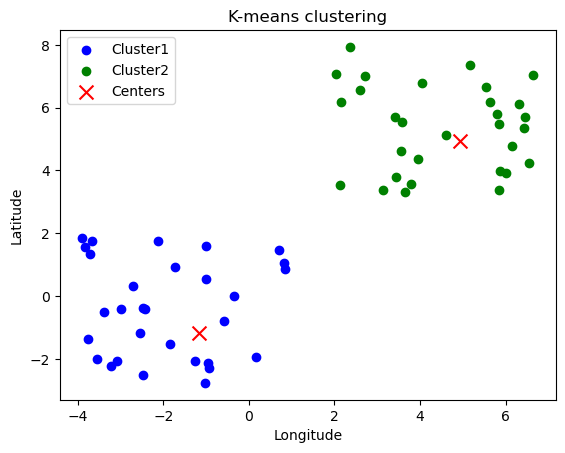

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [81]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)